# Model Evaluation

In this notebook, we train our Random Forest model with the parameters identified by the Grid Search algorithm. We then evaluate it on our test set as well as two new unseen datasets (768 molecule and 512 molecule datasets).

In [1]:
# Importing the relevant libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve

In [2]:
# Reading the three dataframes (already clustered using BGMM)
df_1024_clustered = pd.read_csv("data/1024_clustered.csv").dropna()
df_768_clustered = pd.read_csv("data/768_clustered.csv").dropna()
df_512_clustered = pd.read_csv("data/512_clustered.csv").dropna()

In [4]:
features = ['LSI_all', 'zeta_all', 'd5_all', 'Sk_all', 'q_all', 'Q6_all']

labels = df_1024_clustered['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_1024_clustered[features], labels, test_size=0.2, random_state=42)

In [5]:
# Update Random Forest classifier with the full set of specified hyperparameters
rf = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=20,
    max_features=None,
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=5,
    min_weight_fraction_leaf=0.0,
    n_estimators=50,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)

# Train the model on the training set
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=5,
                       n_estimators=50)

In [6]:
# Predict the labels on the test dataset
predicted_labels_test = rf.predict(X_test)
print("Predictions Generated for Test Set.")

Predictions Generated for Test Set.


In [7]:
# Calculate evaluation metrics for the test set
f1_test = f1_score(y_test, predicted_labels_test)
accuracy_test = accuracy_score(y_test, predicted_labels_test)
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)

print(f"Test Set Random Forest F1: {f1_test}")
print(f"Test Set Random Forest Accuracy: {accuracy_test}")
print(f"Test Set Random Forest Precision: {precision_test}")
print(f"Test Set Random Forest Recall: {recall_test}")

Test Set Random Forest F1: 0.9927241466366439
Test Set Random Forest Accuracy: 0.9963613746279761
Test Set Random Forest Precision: 0.9946697251381948
Test Set Random Forest Recall: 0.9907861643975462


In [10]:
# Predict the labels on the new 768 dataset
predicted_labels = rf.predict(df_768_clustered[features])
print("768 Predictions Generated.")

# Calculate evaluation metrics
f1 = f1_score(df_768_clustered['labels'], predicted_labels)
accuracy = accuracy_score(df_768_clustered['labels'], predicted_labels)
precision = precision_score(df_768_clustered['labels'], predicted_labels)
recall = recall_score(df_768_clustered['labels'], predicted_labels)

print(f"768 Random Forest F1: {f1}")
print(f"768 Random Forest Accuracy: {accuracy}")
print(f"768 Random Forest Precision: {precision}")
print(f"768 Random Forest Recall: {recall}")

768 Predictions Generated.
768 Random Forest F1: 0.9696629270560027
768 Random Forest Accuracy: 0.9851883680555555
768 Random Forest Precision: 0.9967320295566348
768 Random Forest Recall: 0.9440252281497725


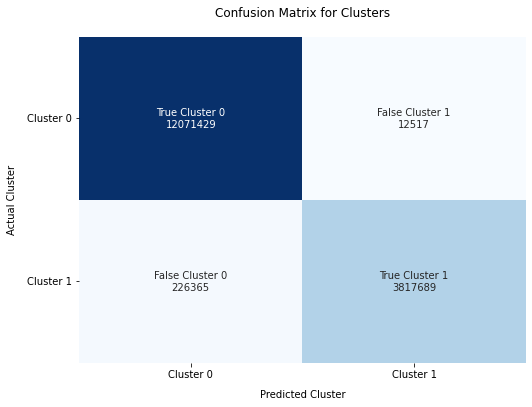

768 Confusion Matrix Saved


<Figure size 432x288 with 0 Axes>

In [11]:
# Confusion Matrix Visualization
cm = confusion_matrix(df_768_clustered['labels'], predicted_labels)
plt.figure(figsize=(8, 6))

# Define the labels for the confusion matrix
group_names = ['True Cluster 0', 'False Cluster 1', 'False Cluster 0', 'True Cluster 1']

# Create a 2x2 array with the custom labels
labels = (np.asarray(["{0}\n{1}".format(name, count)
                      for name, count in zip(group_names, cm.flatten())])
          .reshape(2, 2))

# Plot the heatmap with the custom labels
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)

plt.title('Confusion Matrix for Clusters', pad=20)
plt.ylabel('Actual Cluster', labelpad=10)
plt.xlabel('Predicted Cluster', labelpad=10)
plt.xticks(ticks=[0.5, 1.5], labels=['Cluster 0', 'Cluster 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Cluster 0', 'Cluster 1'], rotation=0, va='center')

# Save the figure
plt.show()
plt.savefig("confusion_matrix_768.png", bbox_inches='tight', dpi=300)
print("768 Confusion Matrix Saved")

In [12]:
# Predict the labels on the new 512 dataset
predicted_labels = rf.predict(df_512_clustered[features])
print("512 Predictions Generated.")

512 Predictions Generated.


In [13]:
# Calculate evaluation metrics
f1 = f1_score(df_512_clustered['labels'], predicted_labels)
accuracy = accuracy_score(df_512_clustered['labels'], predicted_labels)
precision = precision_score(df_512_clustered['labels'], predicted_labels)
recall = recall_score(df_512_clustered['labels'], predicted_labels)

print(f"512 Random Forest F1: {f1}")
print(f"512 Random Forest Accuracy: {accuracy}")
print(f"512 Random Forest Precision: {precision}")
print(f"512 Random Forest Recall: {recall}")

512 Random Forest F1: 0.978349830083413
512 Random Forest Accuracy: 0.9890418526785715
512 Random Forest Precision: 0.9678987442654254
512 Random Forest Recall: 0.989029074994613


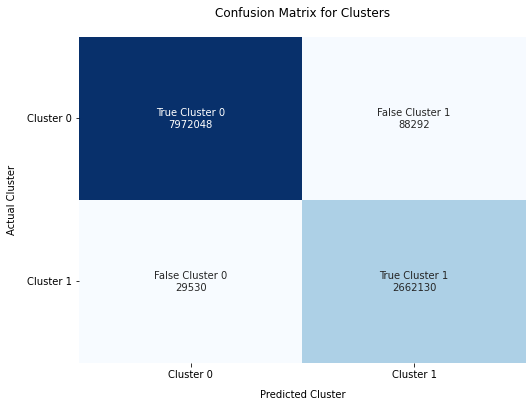

512 Confusion Matrix Saved


<Figure size 432x288 with 0 Axes>

In [14]:
# Confusion Matrix Visualization
cm = confusion_matrix(df_512_clustered['labels'], predicted_labels)
plt.figure(figsize=(8, 6))

# Define the labels for the confusion matrix
group_names = ['True Cluster 0', 'False Cluster 1', 'False Cluster 0', 'True Cluster 1']

# Create a 2x2 array with the custom labels
labels = (np.asarray(["{0}\n{1}".format(name, count)
                      for name, count in zip(group_names, cm.flatten())])
          .reshape(2, 2))

# Plot the heatmap with the custom labels
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)

plt.title('Confusion Matrix for Clusters', pad=20)
plt.ylabel('Actual Cluster', labelpad=10)
plt.xlabel('Predicted Cluster', labelpad=10)
plt.xticks(ticks=[0.5, 1.5], labels=['Cluster 0', 'Cluster 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Cluster 0', 'Cluster 1'], rotation=0, va='center')

# Save the figure
plt.show()
plt.savefig("confusion_matrix_512.png", bbox_inches='tight', dpi=300)
print("512 Confusion Matrix Saved")